In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading dataset

In [2]:
data=pd.read_csv('titanic.csv')

### Handling missing values and droping not usefull columns 

In [3]:
#create copy of dataset
df=data.copy()

In [4]:
#Drop columns
df.drop(columns=['Ticket','Name','PassengerId','Cabin'],inplace=True)

In [5]:
#Filling null values

In [6]:
#Filling age with mean
df['Age']=df['Age'].fillna(df['Age'].mean())

In [7]:
#Filling Cabin with mode
#df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])

In [8]:
#Filling Embarked with mode
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [9]:
##converting objects into int

In [10]:
df['Sex']=data['Sex'].astype(str)

In [11]:
df['Sex']=pd.get_dummies(df['Sex'],drop_first=True).astype(int)

In [12]:
df['Age']=df['Age'].astype(int)
df['Embarked']=df['Embarked'].astype(str)

In [13]:
df['Embarked']=df['Embarked'].replace({'S':1,'C':2,'Q':3})

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [17]:
df_cor=df.corr()

<Axes: >

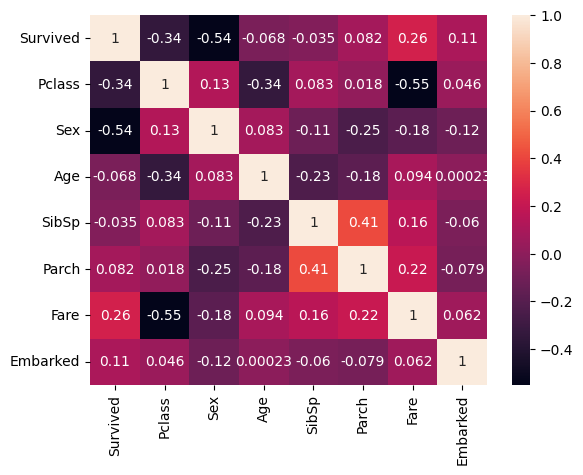

In [18]:
sns.heatmap(df_cor,annot=True)

In [19]:
x=df.drop(columns=['Survived'])

In [20]:
y=df['Survived']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10)

In [23]:
from sklearn.linear_model import LinearRegression

In [25]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pre=model.predict(x_test)

In [29]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pre)

In [32]:
print("The r square of the algorithm is:"r2*100)

36.046022806910074
